In [1]:
import pickle as pkl
import matplotlib.pylab as plt
import numpy as np

In [2]:
name = '/home/ir-zani1/rds/rds-ukaea-ap001/ir-zani1/qualikiz/UKAEAGroupProject/outputs/efiitg_gb/pipeline_outputs_lam_1.pkl'
with open(name,'rb') as f:
    dic = pkl.load(f)

In [3]:
dic.keys()

dict_keys(['train_losses', 'test_losses', 'n_train_points', 'mse_before', 'mse_after', 'd_mse', 'd_uncert', 'd_novel_uncert', 'valid_pred_before', 'valid_pred_after', 'class_train_loss', 'class_val_loss', 'class_missed_loss', 'class_train_acc', 'class_val_acc', 'class_missed_acc'])

In [4]:
plt.plot(range(len(dic['holdout_pred_before'])), dic['holdout_pred_before'], label='before')
plt.plot(range(len(dic['holdout_pred_after'])), dic['holdout_pred_after'], label='after')
plt.legend()

/home/ir-zani1/anaconda3/envs/qualikiz/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 362x300022 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [6]:
np.asarray(dic['holdout_pred_before']).shape

(10, 10000)

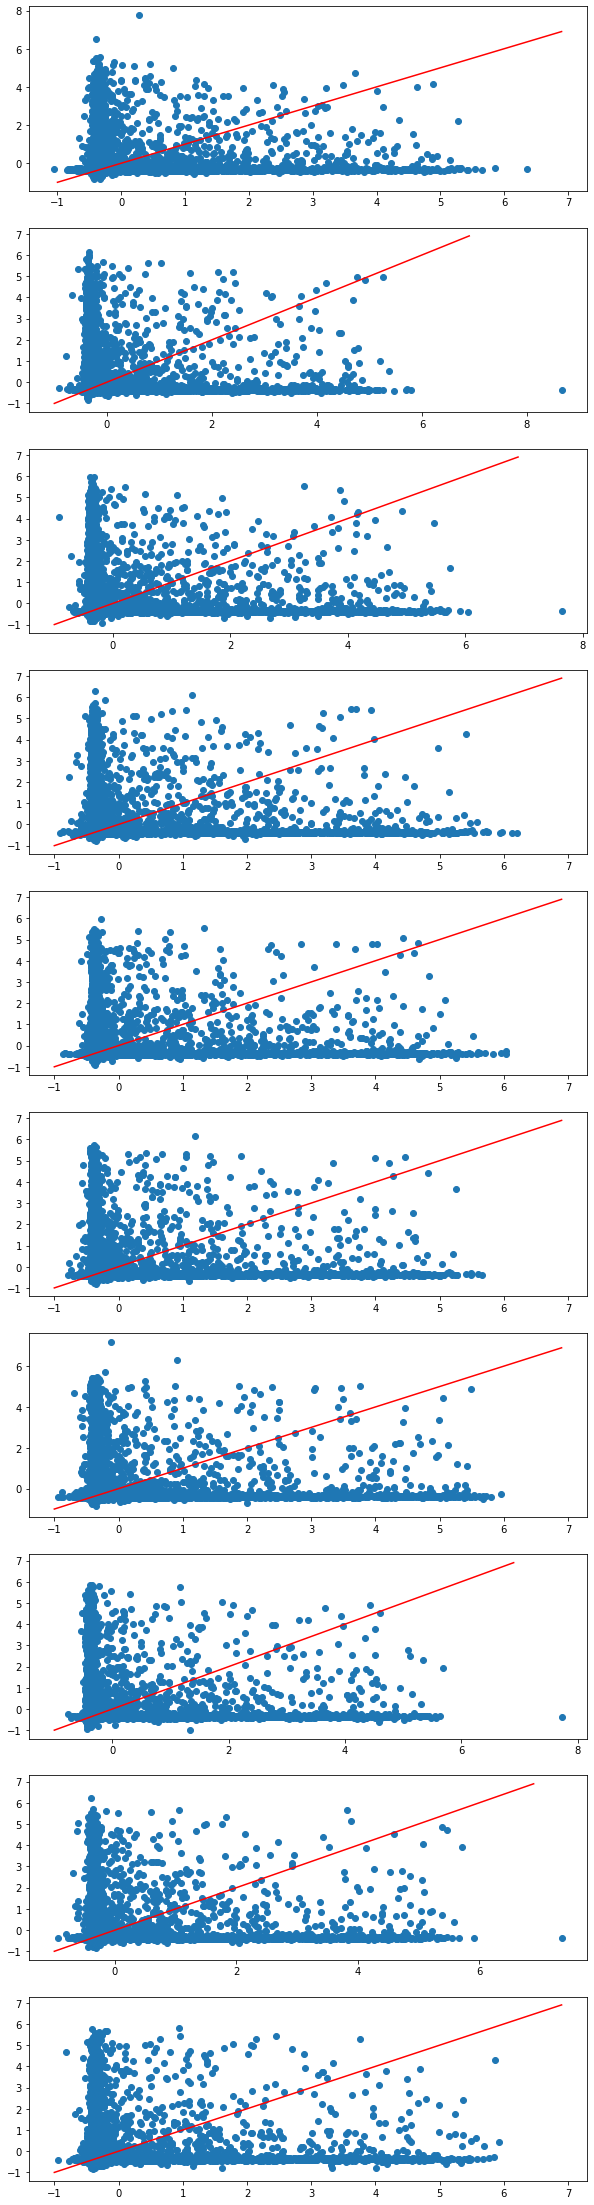

In [7]:
dim1 = len(dic['holdout_pred_before'])
fig, ax = plt.subplots(dim1, 1, figsize=(10,40))
for a, (d1,d2) in zip(ax.ravel(),  zip(dic['holdout_pred_before'], dic['holdout_pred_after'])):
    a.scatter(d1,d2)
    xx = np.arange(-1,7,0.1)
    a.plot(xx,xx, color='red')


In [ ]:
# To Do: add comparison with big model trained on 10^4 data points
# To Do: convert training size to percentage
# To Do:  explore candidate_batch hyperparam
# To Do: save scaler! Or descale all losses

20000
20591
21158
21735
22321
22897
23492
24081
24679
25258


Text(0, 0.5, 'MSE')

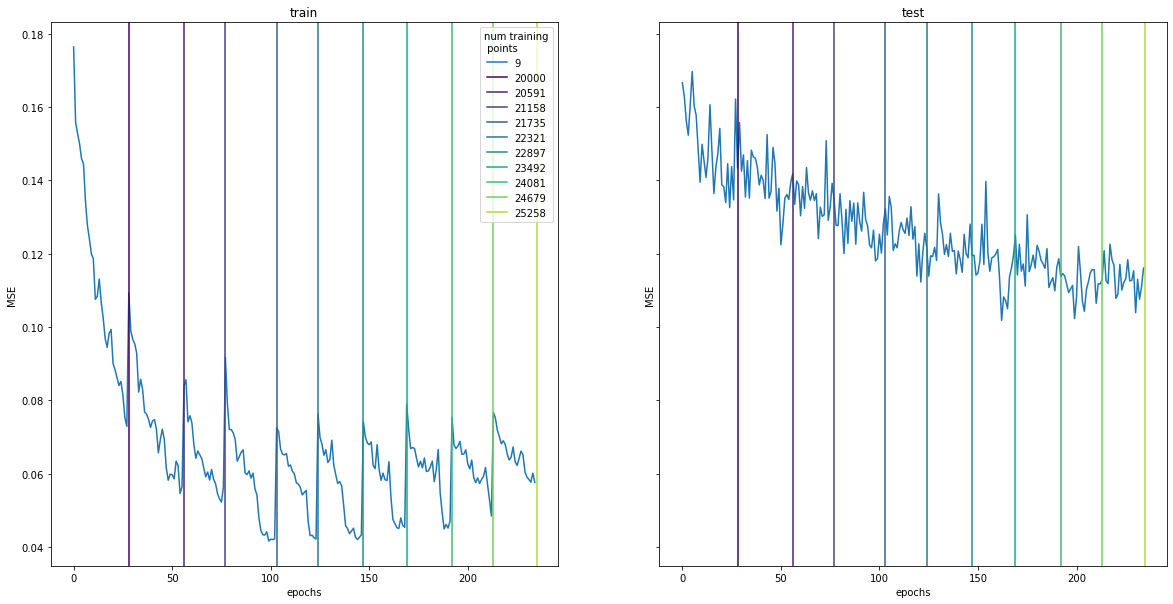

In [27]:
g, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)
train = []
test = []
breaks = []
for i,(d1,d2) in enumerate(zip(dic['train_losses'],dic['test_losses'])):
    train.extend(d1)
    test.extend(d2)
    breaks.extend([len(d1)])
breaks = np.cumsum(breaks)
colors = [ plt.get_cmap('viridis')(i*25) for i in range(len(breaks))]
ax[0].plot(range(len(train)), train, label=str(i))
ax[1].plot(range(len(test)), test, label=str(i))
for c, (label, b) in zip(colors,zip(dic['n_train_points'],breaks)):
    print(label)
    ax[0].axvline(b, label=label, color=c)
    ax[1].axvline(b, label=label,color=c)

ax[0].set_title('train')
ax[1].set_title('test')
ax[0].legend(title="num training\n points")
ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
ax[0].set_ylabel('MSE')
ax[1].set_ylabel('MSE')

In [24]:
dic['n_train_points']

[20000, 20591, 21158, 21735, 22321, 22897, 23492, 24081, 24679, 25258]